Evaluate the profitability of bitcoin mining in MISO when prices are negative.

In [1]:
import os, sys
sys.path.append(os.getcwd().replace("/docs","/source"))
import miso

In [2]:
lmp = miso.Node("2021-01-01","2021-12-31","rt_lmp_final",values="LMP",types="Loadzone")

In [3]:
node = "OTP.MDU"
prices = lmp.dataframe().reset_index().set_index(["Node","Datetime"]).loc[node]

In [5]:
total_hashrate = 150e18 # 150 Eh/s
block_rate = 6
block_reward = 6.25
unit_hashrate = 110e12 # 110 Th/s
unit_coinrate = unit_hashrate/total_hashrate
unit_power = 3.5e-3 # MW

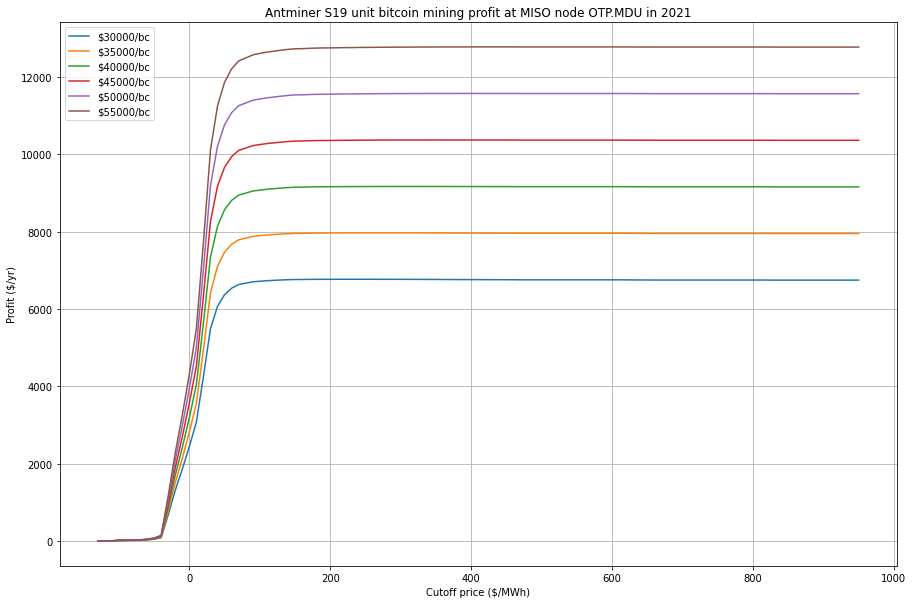

In [6]:
import numpy
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for coinprice in range(30000,60000,5000): # $/bc
    cutoffs = list(numpy.arange(prices.Value.min(),prices.Value.max(),10))
    profits = []
    for price_cutoff in cutoffs:
        price_running = prices.Value[prices.Value<=price_cutoff]
        unit_cost = (price_running*unit_power).sum()
        unit_profit = unit_coinrate*block_rate*block_reward * coinprice * price_running.count() - unit_cost
        profits.append(unit_profit)
    plt.plot(cutoffs,profits,label=f"${coinprice}/bc")
plt.grid()
plt.legend()
plt.xlabel("Cutoff price ($/MWh)")
plt.ylabel("Profit ($/yr)")
plt.title(f"Antminer S19 unit bitcoin mining profit at MISO node {node} in 2021");

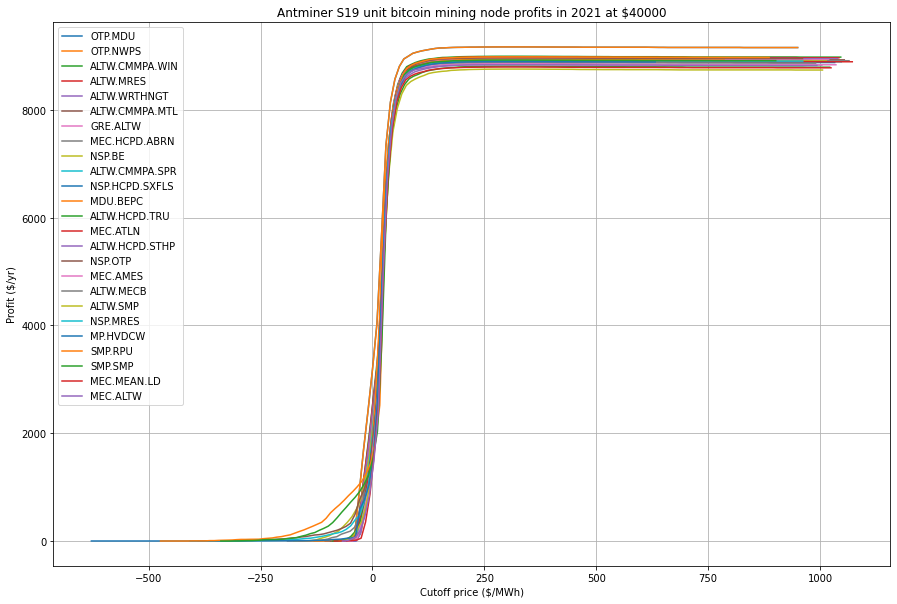

In [19]:
coinprice = 40000 # $/bc
data = lmp.dataframe()
neg = (data[data.Value<0].groupby("Node").count() / data.groupby("Node").count()).dropna().sort_values("Value",ascending=False)
plt.figure(figsize=(15,10))
data = lmp.dataframe().reset_index().set_index(["Node","Datetime"])
for node in neg.index[:25]:
    prices = data.loc[node]
    cutoffs = list(numpy.arange(prices.Value.min(),prices.Value.max(),10))
    profits = []
    for price_cutoff in cutoffs:
        price_running = prices.Value[prices.Value<=price_cutoff]
        unit_cost = (price_running*unit_power).sum()
        unit_profit = unit_coinrate*block_rate*block_reward * coinprice * price_running.count() - unit_cost
        profits.append(unit_profit)
    plt.plot(cutoffs,profits,label=node)
plt.grid()
plt.legend()
plt.xlabel("Cutoff price ($/MWh)")
plt.ylabel("Profit ($/yr)")
plt.title(f"Antminer S19 unit bitcoin mining node profits in 2021 at ${coinprice}");

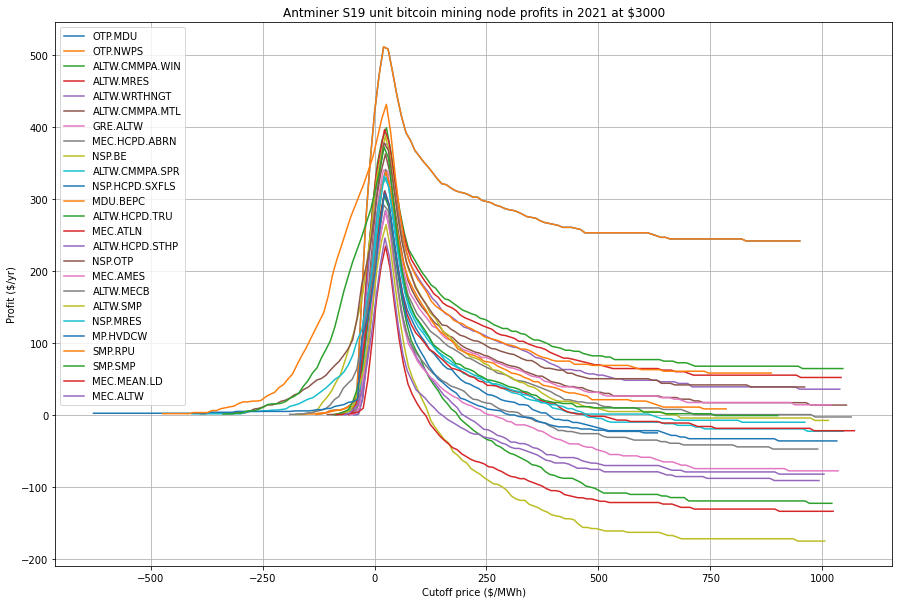

In [21]:
coinprice = 3000 # $/bc
data = lmp.dataframe()
neg = (data[data.Value<0].groupby("Node").count() / data.groupby("Node").count()).dropna().sort_values("Value",ascending=False)
plt.figure(figsize=(15,10))
data = lmp.dataframe().reset_index().set_index(["Node","Datetime"])
for node in neg.index[:25]:
    prices = data.loc[node]
    cutoffs = list(numpy.arange(prices.Value.min(),prices.Value.max(),10))
    profits = []
    for price_cutoff in cutoffs:
        price_running = prices.Value[prices.Value<=price_cutoff]
        unit_cost = (price_running*unit_power).sum()
        unit_profit = unit_coinrate*block_rate*block_reward * coinprice * price_running.count() - unit_cost
        profits.append(unit_profit)
    plt.plot(cutoffs,profits,label=node)
plt.grid()
plt.legend()
plt.xlabel("Cutoff price ($/MWh)")
plt.ylabel("Profit ($/yr)")
plt.title(f"Antminer S19 unit bitcoin mining node profits in 2021 at ${coinprice}");